# Challenge Data Science - Setembro 2022

**Identificar pacientes com alto risco cardiovascular**

Autor: Jorge Chamby Diaz
_________

## O Problema

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro de cada 5 mortes por CVDs são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. 

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

## Os dados

A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca:

- Medidas de 11 variáveis que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - Age: idade do paciente (anos)
    - 2 - Sex: sexo do paciente (M: Masculino, F: Feminino)
    - 3 - ChestPainType: tipo de dor no peito (TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática)
    - 4 - RestingBP: pressão arterial de repouso (mm Hg)
    - 5 - Cholesterol: colesterol sérico (mm/dl)
    - 6 - FastingBS: glicemia em jejum (1: se FastingBS > 120 mg/dl, 0: caso contrário)
    - 7 - RestingECG: resultados do eletrocardiograma de repouso (Normal: normal, ST: com anormalidade da onda ST-T, LVH: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes)
    - 8 - MaxHR: frequência cardíaca máxima alcançada (Valor numérico entre 60 e 202)
    - 9 - ExerciseAngina: angina induzida por exercício (Y: Sim, N: Não)
    - 10 - Oldpeak: pico antigo = ST (Valor numérico medido em depressão)
    - 11 - ST_Slope: a inclinação do segmento ST do exercício de pico (Up: upsloping, Flat: flat, Down: downsloping)    
<br><br>
- Além disso, há a variável resposta que no caso é uma variável binária:
<br><br>
    - 12 - HeartDisease: classe de saída (1: doença cardíaca, 0: normal)

Para maiores informações sobre a coleta e origem dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) 

**Para baixar os conjuntos de dados, podem acessar diretamente a este [link](https://github.com/jchambyd/Datasets/tree/main/Heart-disease)**

## O Challenge

Suponha que você é um cientista de dados que trabalha na área de *bioinformatica* de uma clínica especializada no tratamento de doenças cardiovasculares. Nos últimos meses a empresa tem recebido uma grande quantidade de pacientes (o que é muito bom!), permitindo gerar um histórico de todos os pacientes que foram para consulta e saíram com um diagnóstico. Para simplificar as coisas, o diagnóstico foi reduzido a duas possíveis respostas: 'positivo' ou 'negativo'. Positivo significa que o paciente apresenta alguma doença cardiovascular, e negativo significa que a pessoa está livre de doenças cardiovasculares. A empresa pede para você construir um modelo preditivo que permita, a partir de um conjunto prévio de exames feitos sobre um paciente novo, identificar se o paciente possui ou não uma doença cardiovascular.

Com este modelo, os médicos vão ter uma ferramenta de apoio muito útil para realizar o diagnóstico de doenças cardiovasculares para novos pacientes que a clínica receba no futuro.

Dentro deste contexto, seu objetivo como cientista de dados é claro:

> Agregar valor ao negócio, explorando os dados que você tem à disposição.

Na primeira sprint do projeto, você e outros colegas do time de ciência de dados chegaram na seguinte _TO-DO list_ para o projeto. Algumas atividades já foram executadas nas primeiras semanas de trabalho (o time é muito bom!), mas agora ainda restam algumas atividades muito importantes (e divertidas!) a serem feitas:

- [x] Ingestão dos dados e detalhada análise exploratória
- [x] Formulação do problema
- [ ] Primeiro modelo baseline
- [ ] Iterações pelo ciclo de modelagem
- [ ] Compílação dos resultados para o negócio
- [ ] Comunicação dos resultados

Bom trabalho, e divirta-se! :D

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer

In [2]:
data_heart = pd.read_csv('../datasets/heart.csv')

In [3]:
data_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


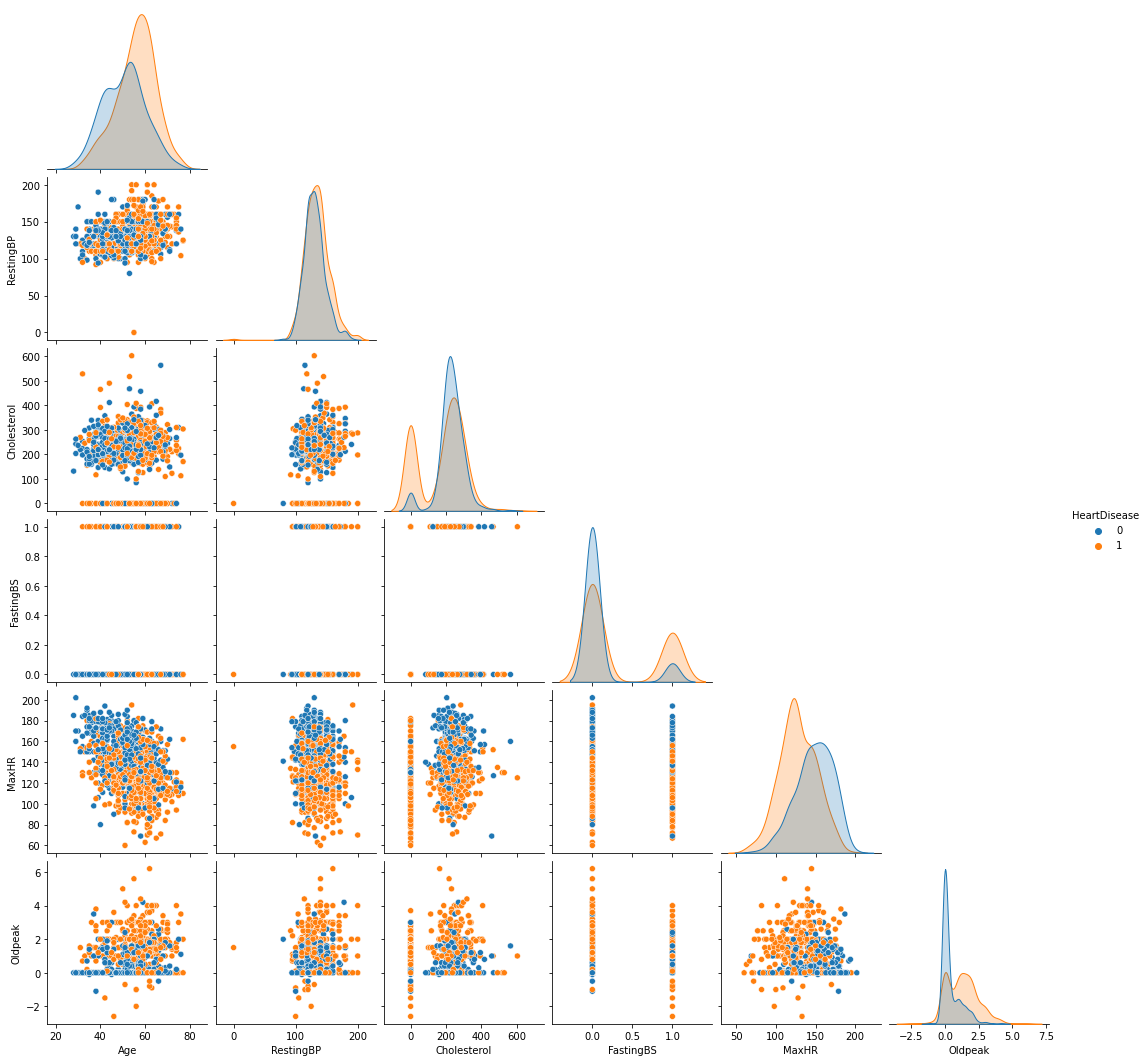

In [5]:
sns.pairplot(data_heart, hue ='HeartDisease', corner=True );

<AxesSubplot:>

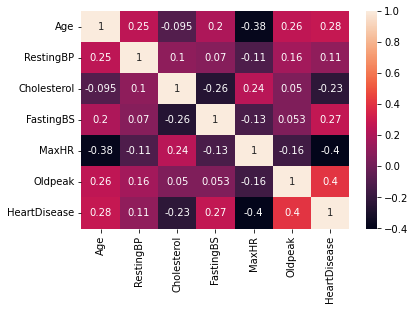

In [6]:
corr = data_heart.corr()
sns.heatmap(corr, cmap='rocket', annot=True)

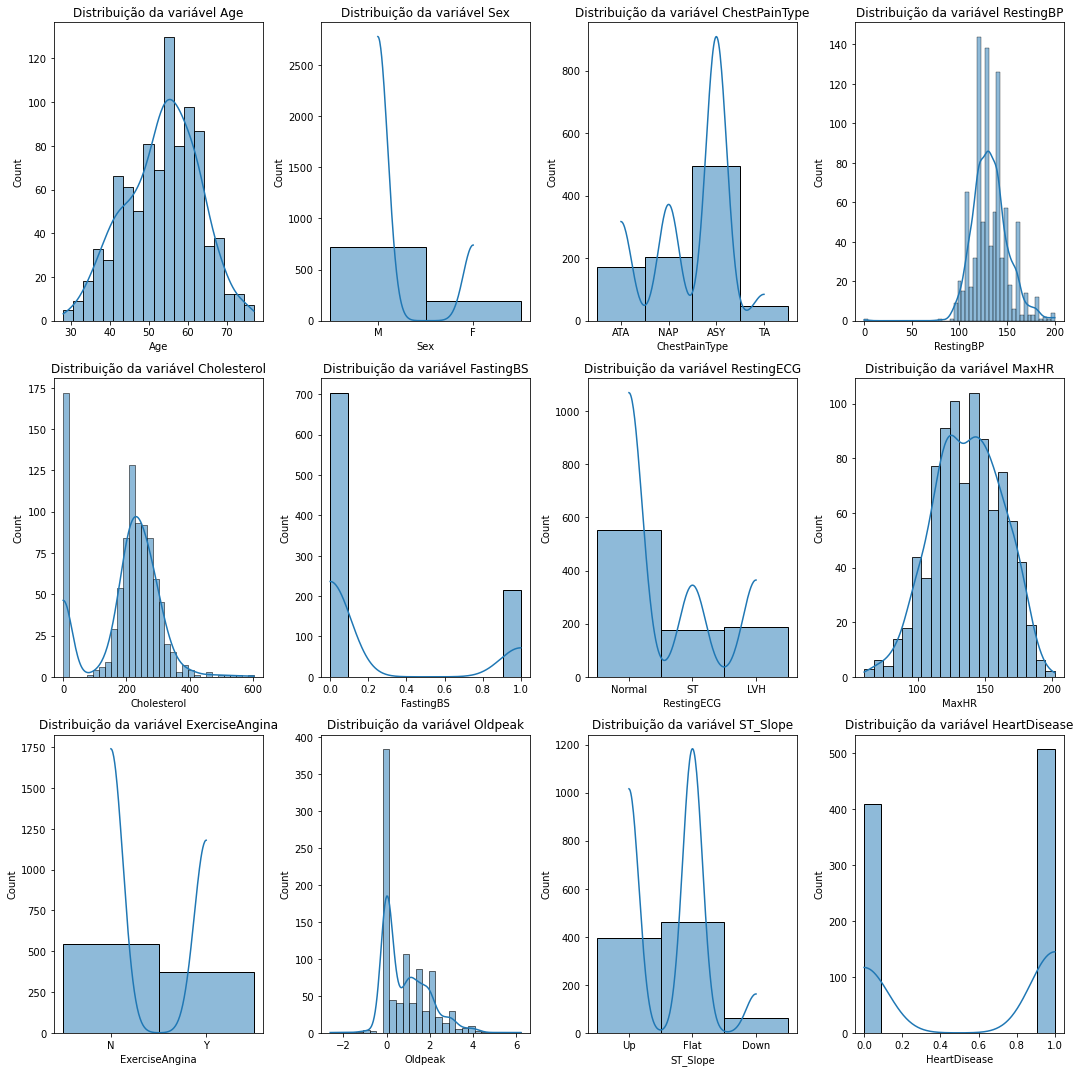

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axes = axes.ravel()  # Transforma a matriz de eixos em uma lista plana

# Itera sobre as colunas e os eixos correspondentes
for col_idx, col_name in enumerate(data_heart.columns):
    sns.histplot(data = data_heart, x = col_name, kde = True, ax = axes[col_idx])
    axes[col_idx].set_title(f"Distribuição da variável {col_name}")

# Ajusta o layout dos subplots
plt.tight_layout()
plt.show()

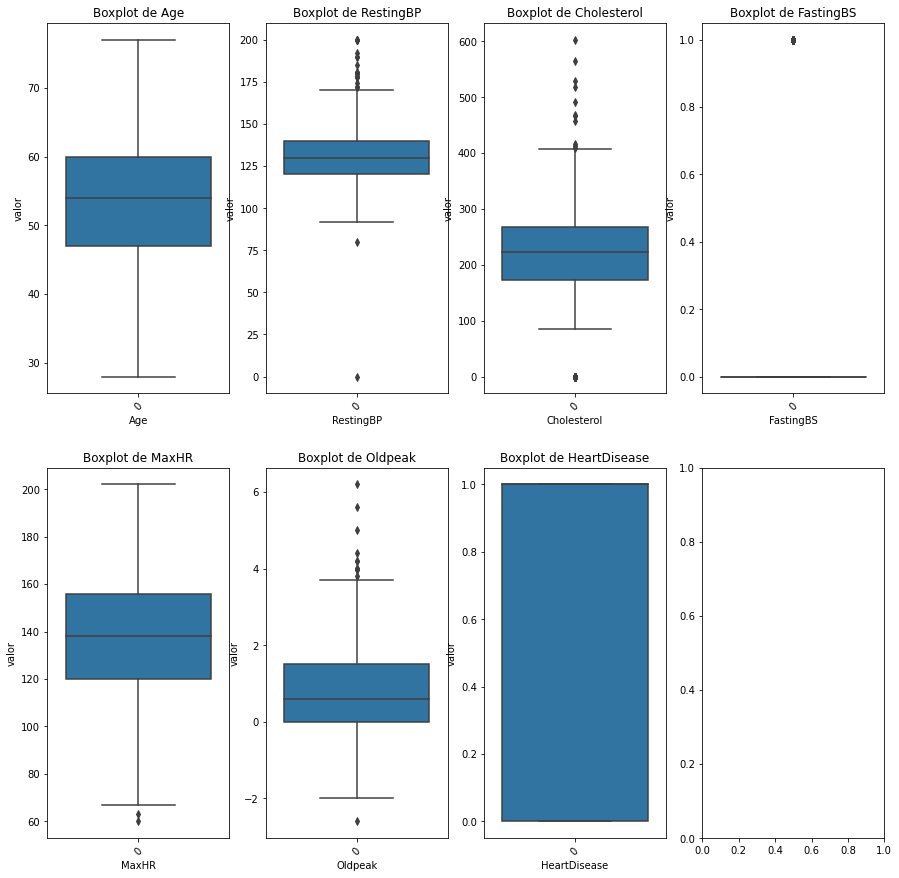

In [8]:
num_features = data_heart.select_dtypes(include=np.number)
fig, ax = plt.subplots(2,4,figsize=(15,15))
ax = np.ravel(ax)

for i, column in enumerate(num_features):
    sns.boxplot(data=num_features[column], ax=ax[i])
    ax[i].set_title(f'Boxplot de {column}')
    ax[i].set_xlabel(f'{column}')
    ax[i].set_ylabel('valor')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

In [9]:
data_heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [10]:
x = data_heart.drop(columns='HeartDisease')
y = data_heart['HeartDisease']


In [11]:
cat_features = x.select_dtypes(exclude=np.number).columns.to_list()
transform_pipe = Pipeline([('ohe', OneHotEncoder())])

preprocessing = ColumnTransformer([('cat_transform', transform_pipe, cat_features)],remainder='passthrough')

In [12]:
# modelo baseline
base_pipe_xgb = Pipeline([('preprocessing', preprocessing),
                      ('mm_scaler', StandardScaler()),
                      ('xgboost', xgb.XGBClassifier(booster='gbtree'))])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True, stratify=y, random_state=42)

base_pipe_xgb.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('mm_scaler', StandardScaler()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsam...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,

In [13]:
y_predict = base_pipe_xgb.predict(x_test)

In [14]:
score_test_baseline_xgb = classification_report(y_test, y_predict)
print(score_test_baseline_xgb)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       123
           1       0.91      0.88      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [15]:
y_train_predict = base_pipe_xgb.predict(x_train)

In [16]:
score_baseline_xgb = classification_report(y_train, y_train_predict)
print(score_baseline_xgb)
## O modelo xgboost baseline overfitou.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       355

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



In [17]:
# testando com SVC
base_pipe_svc = Pipeline([('preprocessing', preprocessing),
                      ('mm_scaler', StandardScaler()),
                      ('svc', SVC(random_state=42))])


In [18]:
base_pipe_svc.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('mm_scaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [19]:
y_predict = base_pipe_svc.predict(x_test)

In [20]:
score_baseline_svc = classification_report(y_test, y_predict)
print(score_baseline_svc)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       123
           1       0.87      0.94      0.91       153

    accuracy                           0.89       276
   macro avg       0.90      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



In [21]:
y_predict_train = base_pipe_svc.predict(x_train)

In [22]:
score_baseline_svc = classification_report(y_train, y_predict_train)
print(score_baseline_svc)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       287
           1       0.88      0.95      0.91       355

    accuracy                           0.90       642
   macro avg       0.90      0.89      0.90       642
weighted avg       0.90      0.90      0.90       642



## Buscando melhores configurações de hiperparâmetros

In [23]:
tuning_pipe = Pipeline([('preprocessing', preprocessing),
                        ('mm_scaler', StandardScaler()),
                        ('xgboost', xgb.XGBClassifier(booster='gbtree'))])

In [24]:
params_dict = {
               'xgboost__eta': np.arange(0, 0.6, 0.05),
               'xgboost__gamma': np.arange(0, 50, 0.5),
               'xgboost__max_depth': range(11,20)
               }

In [25]:
from sklearn.model_selection import StratifiedKFold
kf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
random_search = RandomizedSearchCV(estimator=tuning_pipe, param_distributions=params_dict, scoring='precision', cv=kf5, n_iter=200, random_state=42, n_jobs=-1)

In [27]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat_transform',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder())]),
                                                                               ['Sex',
                                                                                'ChestPainType',
                                                                                'RestingECG',
                                                                                'ExerciseAngina',
                                                                           

In [28]:
random_search.best_params_

{'xgboost__max_depth': 15, 'xgboost__gamma': 5.5, 'xgboost__eta': 0.55}

In [29]:
random_search.best_score_

0.857163456187551

In [30]:
y_tun_predict = random_search.predict(x_test)


In [31]:
score_tuning = classification_report(y_test, y_tun_predict)
print(score_tuning)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       123
           1       0.91      0.88      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



In [32]:
y_tun_train_predict = random_search.predict(x_train)


In [33]:
score_tuning = classification_report(y_train, y_tun_train_predict)
print(score_tuning)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       287
           1       0.90      0.93      0.91       355

    accuracy                           0.90       642
   macro avg       0.90      0.90      0.90       642
weighted avg       0.90      0.90      0.90       642



In [34]:
tuning_pipe_svc = Pipeline([('preprocessing', preprocessing),
                            ('mm_scaler', StandardScaler()),
                            ('svc', SVC(probability=True,random_state=42))])

In [35]:
params_dict = {
               'svc__C': np.arange(0.3, 1, 0.05),
               'svc__kernel': ['linear','poly','rbf','sigmoid','precomputed'],
               'svc__degree': range(2,8)
               }

In [36]:
random_search = RandomizedSearchCV(estimator=tuning_pipe_svc, param_distributions=params_dict, scoring='precision', cv=kf5, n_iter=200, random_state=42, n_jobs=-1)

In [37]:
random_search.fit(x_train, y_train)

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.84749219        nan 0.84749219        nan 0.72552488 0.84167616
 0.8281448  0.8281448  0.84749219 0.83199435 0.84749219        nan
 0.84087843 0.84749219 0.72110981 0.84256922        nan 0.83514205
 0.7734611  0.72032602 0.83411774        nan 0.83956782 0.84820987
 0.84749219 0.83938809 0.66994695 0.84018098 0.80654237        nan
        nan 0.68305038 0.84552529        nan 0.83956782        nan
 0.84820987        nan 0.84756558 0.83514205 0.84749219 0.75949545
 0.84776356 0.84851777 0.84062268 0.84776356 0.84848195        nan
 0.84012615 0.84749219 0.84167616 0.84001048 0.84749219        nan
        nan 0.84208987 0.84776356 0.84018098 0.83199435 0.83199435
 0.72441602        nan 0.84749219        nan 0.8307605  0.84549388
 0.71414463 0.83642025 0.84756558 0.84776356        nan 0.84012615
 0.71574264 0.84018098 0.83837395 0.75488917        n

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat_transform',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder())]),
                                                                               ['Sex',
                                                                                'ChestPainType',
                                                                                'RestingECG',
                                                                                'ExerciseAngina',
                                                                           

In [38]:
random_search.best_params_

{'svc__kernel': 'sigmoid', 'svc__degree': 2, 'svc__C': 0.35}

In [39]:
random_search.best_score_

0.8485177673412968

In [40]:
y_tun_predict = random_search.predict(x_test)

In [41]:
score_tuning = classification_report(y_test, y_tun_predict)
print(score_tuning)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       123
           1       0.89      0.91      0.90       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



## Otimização Bayesiana

In [42]:
from hyperopt import hp, tpe, fmin, Trials, space_eval


In [43]:
hps_space = {'eta': hp.choice('eta', np.arange(0, 0.6, 0.05)),
             'gamma': hp.choice('gamma', np.arange(0, 50, 0.5)),
             'max_depth': hp.choice('max_depth', range(3,20))}

In [44]:
from sklearn.model_selection import cross_validate

def funcao_objetivo(hps_space): 
    pipe = Pipeline([('preprocessing', preprocessing),
                     ('mm_scaler', StandardScaler()),
                     ('xgboost', xgb.XGBClassifier(booster='gbtree', **hps_space))])

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    resultado = cross_validate(pipe,
                           x_train, y_train, 
                           cv=splitter,
                           scoring="f1",
                           n_jobs=-1
                           )

    media_f1 = resultado["test_score"].mean()
    
    return -media_f1

In [45]:
trials = Trials()

best_hps = fmin(funcao_objetivo, # função objetivo
                space=hps_space, # o espaço de parâmetros
                algo=tpe.suggest, # o tpe para o surrogate
                trials=trials, # trials para registrar o histórico
                rstate=np.random.default_rng(42), # semente randomica 
                max_evals=100) # número máximo de avaliações

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:14<00:00,  7.04trial/s, best loss: -0.8690227284401866]


In [46]:
best_hps

{'eta': 7, 'gamma': 29, 'max_depth': 14}

In [47]:
best_hps = space_eval(hps_space, best_hps)

In [48]:
best_hps

{'eta': 0.35000000000000003, 'gamma': 14.5, 'max_depth': 17}

In [49]:
pipe_xgb_baye = Pipeline([('preprocessing', preprocessing),
                         ('mm_scaler', StandardScaler()),
                         ('xgboost', xgb.XGBClassifier(booster='gbtree', **best_hps))])


In [50]:
pipe_xgb_baye.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('mm_scaler', StandardScaler()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsam...
                               feature_types=None, gamma=14.5, gpu_id=None,
                               grow_policy=None, importance_type=None,

In [51]:
y_xgb_baye = pipe_xgb_baye.predict(x_test)

In [52]:
score_tuning = classification_report(y_test, y_xgb_baye)
print(score_tuning)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       123
           1       0.88      0.93      0.91       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



In [53]:
hps_space = {'C': hp.choice('C', np.arange(0.3, 1, 0.05)),
             'kernel': hp.choice('kernel',['linear','poly','rbf','sigmoid','precomputed']),
             'degree': hp.choice('degree', range(2,8))}

In [54]:
def funcao_objetivo_svc(hps_space): 
    pipe = Pipeline([('preprocessing', preprocessing),
                     ('ss_scaler', StandardScaler()),
                     ('svc', SVC(**hps_space))])

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    resultado = cross_validate(pipe,
                           x_train, y_train, 
                           cv=splitter,
                           scoring="f1",
                           n_jobs=-1
                           )

    media_f1 = resultado["test_score"].mean()
    
    return -media_f1

In [55]:
trials = Trials()

best_hps_svc = fmin(funcao_objetivo_svc, # função objetivo
                    space=hps_space, # o espaço de parâmetros
                    algo=tpe.suggest, # o tpe para o surrogate
                    trials=trials, # trials para registrar o histórico
                    rstate=np.random.default_rng(42), # semente randomica 
                    max_evals=100) # número máximo de avaliações

100%|██████████| 100/100 [00:02<00:00, 38.97trial/s, best loss: -0.8720551063257467]


In [56]:
best_hps_svc

{'C': 0, 'degree': 1, 'kernel': 2}

In [57]:
best_hps_svc = space_eval(hps_space, best_hps_svc)

In [58]:
best_hps_svc

{'C': 0.3, 'degree': 3, 'kernel': 'rbf'}

In [59]:
pipe_svc_baye = Pipeline([('preprocessing', preprocessing),
                         ('mm_scaler', StandardScaler()),
                         ('xgboost', xgb.XGBClassifier(booster='gbtree', **best_hps_svc))])


In [60]:
pipe_svc_baye.fit(x_train, y_train)

[16:04:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "C", "degree", "kernel" } are not used.



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('mm_scaler', StandardScaler()),
                ('xgboost',
                 XGBClassifier(C=0.3, base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,...
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                          

In [61]:
y_svc_baye = pipe_svc_baye.predict(x_test)

In [62]:
score_tuning_svc = classification_report(y_test, y_svc_baye)
print(score_tuning_svc)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       123
           1       0.91      0.88      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

